In [1]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [2]:
!git clone https://github.com/phizaz/cprop

Cloning into 'cprop'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 142 (delta 73), reused 92 (delta 32), pack-reused 0
Receiving objects: 100% (142/142), 807.36 KiB | 11.37 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [2]:
%cd /content/drive/MyDrive/cprop/tf

/content/drive/MyDrive/cprop/tf


In [3]:
import tensorflow as tf
from cprop_tf.cprop import CProp

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
def make_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [9]:
def run(use_cprop):
    opt = tf.keras.optimizers.Adam(lr=1e-3)
    if use_cprop:
        opt = CProp(opt, beta=0.999, c=1, cdf='bft')

    model = make_model()
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model.fit(train_images,
                     train_labels,
                     batch_size=128,
                     epochs=25,
                     validation_data=(test_images, test_labels))

In [10]:
history = {}

In [11]:
import time 
start = time.time()
for use_cprop in [True]:
    history[use_cprop] = run(use_cprop)
print('training time : ',time.time()-start)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
391/391 [==============================] - 20s 21ms/step - loss: 1.6632 - accuracy: 0.3916 - val_loss: 1.3733 - val_accuracy: 0.5037
Epoch 2/25
391/391 [==============================] - 7s 18ms/step - loss: 1.2872 - accuracy: 0.5386 - val_loss: 1.2072 - val_accuracy: 0.5700
Epoch 3/25
391/391 [==============================] - 7s 19ms/step - loss: 1.1337 - accuracy: 0.6003 - val_loss: 1.0849 - val_accuracy: 0.6190
Epoch 4/25
391/391 [==============================] - 7s 19ms/step - loss: 1.0324 - accuracy: 0.6386 - val_loss: 1.0628 - val_accuracy: 0.6268
Epoch 5/25
391/391 [==============================] - 7s 18ms/step - loss: 0.9576 - accuracy: 0.6640 - val_loss: 1.0039 - val_accuracy: 0.6479
Epoch 6/25
391/391 [==============================] - 7s 18ms/step - loss: 0.8969 - accuracy: 0.6875 - val_loss: 0.9323 - val_accuracy: 0.6759
Epoch 7/25
391/391 [==============================] - 7s 18ms/step - loss: 0.8436 - accuracy: 0.7043 - val_loss: 0.9045 - val_accuracy: 0.686

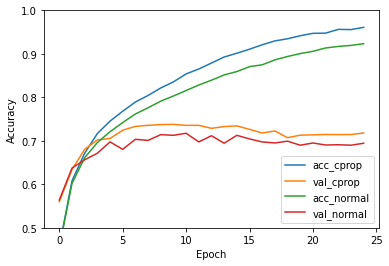

In [10]:
for use_cprop in [True, False]:
    name = 'cprop' if use_cprop else 'normal'
    plt.plot(history[use_cprop].history['accuracy'], label=f'acc_{name}')
    plt.plot(history[use_cprop].history['val_accuracy'], label=f'val_{name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    
plt.savefig('cifar10.png')

In [12]:
history

{False: <keras.callbacks.History at 0x7fc711db2f10>,
 True: <keras.callbacks.History at 0x7fc78a258690>}

In [17]:
import pandas as pd

history_df = pd.DataFrame(history[True].history) 
history_df.to_csv('cprop_basicdnn.csv', index=False)

In [18]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.494941,0.45568,1.219055,0.5600
1,1.104726,0.60766,1.016620,0.6340
2,0.930906,0.67152,0.923148,0.6804
3,0.812467,0.71670,0.866468,0.7021
4,0.728208,0.74530,0.860554,0.7053
5,0.662431,0.76802,0.808398,0.7244
6,0.605941,0.78924,0.803267,0.7332
7,0.558097,0.80434,0.797327,0.7356
8,0.508520,0.82154,0.821468,0.7374
9,0.466312,0.83552,0.832835,0.7378


###Resnet-50

In [6]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [7]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [8]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [9]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [10]:
base_model = ResNet50(input_shape=(32, 32, 3))
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(10,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [11]:
model_resnet = Model(inputs=base_model.input, outputs=headModel)


In [18]:
def run(use_cprop):
    opt = tf.keras.optimizers.Adam(lr=1e-3)
    if use_cprop:
        opt = CProp(opt, beta=0.999, c=1, cdf='bft')
    
    model_resnet.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model_resnet.fit(train_images,
                     train_labels,
                     batch_size=128,
                     epochs=10,
                     validation_data=(test_images, test_labels))

In [19]:
history_resnet = {}

In [20]:
for use_cprop in [True]:
    history_resnet[use_cprop] = run(use_cprop)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
391/391 [==============================] - 260s 503ms/step - loss: 1.1697 - accuracy: 0.5833 - val_loss: 1.7023 - val_accuracy: 0.4966
Epoch 2/10
391/391 [==============================] - 194s 497ms/step - loss: 0.8486 - accuracy: 0.7024 - val_loss: 1.7012 - val_accuracy: 0.5236
Epoch 3/10
391/391 [==============================] - 195s 499ms/step - loss: 0.6515 - accuracy: 0.7730 - val_loss: 0.9849 - val_accuracy: 0.6939
Epoch 4/10
391/391 [==============================] - 195s 499ms/step - loss: 0.4784 - accuracy: 0.8335 - val_loss: 1.0581 - val_accuracy: 0.6854
Epoch 5/10
391/391 [==============================] - 195s 500ms/step - loss: 0.3416 - accuracy: 0.8815 - val_loss: 1.2430 - val_accuracy: 0.6681
Epoch 6/10
391/391 [==============================] - 195s 498ms/step - loss: 0.2356 - accuracy: 0.9197 - val_loss: 1.0647 - val_accuracy: 0.7201
Epoch 7/10
391/391 [==============================] - 194s 497ms/step - loss: 0.1621 - accuracy: 0.9452 - val_loss: 1.3721 -

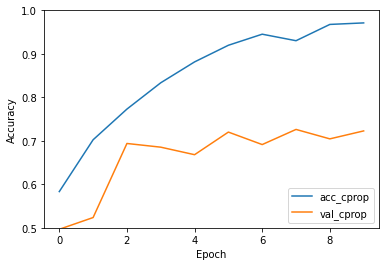

In [22]:
for use_cprop in [True]:
    name = 'cprop' if use_cprop else 'normal'
    plt.plot(history_resnet[use_cprop].history['accuracy'], label=f'acc_{name}')
    plt.plot(history_resnet[use_cprop].history['val_accuracy'], label=f'val_{name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    
plt.savefig('cifar10.png')

In [23]:
import pandas as pd

history_resnet50 = pd.DataFrame(history_resnet[True].history) 
history_resnet50.to_csv('cprop_resnet50.csv', index=False)
history_resnet50

,loss,accuracy,val_loss,val_accuracy
0,1.169678,0.58326,1.702262,0.4966
1,0.848554,0.70242,1.701203,0.5236
2,0.651459,0.77298,0.984857,0.6939
3,0.478407,0.83348,1.058091,0.6854
4,0.341583,0.88148,1.243034,0.6681
5,0.235565,0.91974,1.064653,0.7201
6,0.162095,0.94520,1.372149,0.6914
7,0.205381,0.93020,1.141227,0.7262
8,0.095814,0.96766,1.467162,0.7045
9,0.082387,0.97114,1.434852,0.7228
